In [56]:
import pandas as pd
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn import preprocessing
import numpy as np
%matplotlib inline

In [22]:
data = pd.read_csv('/Users/jasonfong/Downloads/voice.csv')
males = data[data.label == 'male']
females = data[data.label == 'female']

In [23]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [24]:
data['label'] = (data.label == 'male')*1

In [25]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,1
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,1
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,1
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,1
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,1


In [27]:
cols = data.columns
for col in range(len(cols)-1):
    data[cols[col]] = preprocessing.scale(data[cols[col]])
    male_mean = males[cols[col]].mean()
    female_mean = females[cols[col]].mean()
    diff = abs(male_mean - female_mean)
    print(cols[col],male_mean, female_mean, diff)

meanfreq 0.17081349003950747 0.19099973070217632 0.02018624066266886
sd 0.06511010373532049 0.049141826078528024 0.015968277656792464
median 0.17529895983666735 0.19594239311047099 0.020643433273803635
Q25 0.11556203391529257 0.16534914705534454 0.049787113140051964
Q75 0.2263463231411877 0.22318359968875567 0.0031627234524320147
IQR 0.11078428922589478 0.05783445263341138 0.0529498365924834
skew 3.2954602611469426 2.9848747790826993 0.3105854820642433
kurt 48.331697542833425 24.80522403977576 23.526473503057666
sp.ent 0.9171883852533287 0.8730657434115772 0.04412264184175152
sfm 0.471669937823362 0.34476288506667707 0.1269070527566849
mode 0.1520223694632036 0.1785412240405656 0.026518854577362
centroid 0.17081349003950747 0.19099973070217632 0.02018624066266886
meanfun 0.11587163938708586 0.16974182917136693 0.05387018978428107
minfun 0.0341750090156649 0.039428607658650125 0.005253598642985226
maxfun 0.25383632726095184 0.2638481642781685 0.01001183701721664
meandom 0.72887748318476

In [21]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,...,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772,1
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,...,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103,1
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,...,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344,1
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,...,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286,1
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,...,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046,1
5,-1.608666,1.347232,-1.830062,-1.489512,-0.641972,1.340093,-0.284822,-0.209474,1.513245,1.859738,...,-1.608666,-1.011625,-1.024592,-0.162074,-1.011172,-0.708404,-0.659181,-0.646652,-0.406846,1
6,-1.007728,1.041300,-0.701821,-0.977084,-0.805857,0.666485,-0.379617,-0.226681,1.610899,1.996817,...,-1.007728,-1.141269,-0.550156,0.260185,-0.665733,-0.708404,0.075335,0.088098,-0.416623,1
7,-0.681717,1.179662,-1.135596,-0.614797,0.304495,0.867778,-0.411101,-0.235731,1.425930,1.755795,...,-0.681717,-1.540413,-0.990989,-3.814045,-1.005236,-0.708404,-1.280524,-1.268192,0.922549,1
8,-1.292650,1.254833,-1.293742,-1.073498,-0.684457,0.843266,-0.481247,-0.240893,1.680938,2.043886,...,-1.292650,-1.426586,-0.980618,-0.294030,-0.938324,-0.708404,-0.818955,-0.806476,-0.213333,1
9,-1.557104,1.394871,-1.765105,-1.332913,-0.964981,0.983436,-0.459874,-0.235578,1.781516,2.232700,...,-1.557104,-1.143237,-0.910731,0.114817,-0.930919,-0.584964,-0.099973,-0.089485,-0.701898,1


In [43]:
for col in data.columns:
    male_mean = males[col].mean()
    female_mean = females[col].mean()
    diff = abs(male_mean - female_mean)
    print(col,male_mean, female_mean, diff)

meanfreq 0.17081349003950747 0.19099973070217632 0.02018624066266886
sd 0.06511010373532049 0.049141826078528024 0.015968277656792464
median 0.17529895983666735 0.19594239311047099 0.020643433273803635
Q25 0.11556203391529257 0.16534914705534454 0.049787113140051964
Q75 0.2263463231411877 0.22318359968875567 0.0031627234524320147
IQR 0.11078428922589478 0.05783445263341138 0.0529498365924834
skew 3.2954602611469426 2.9848747790826993 0.3105854820642433
kurt 48.331697542833425 24.80522403977576 23.526473503057666
sp.ent 0.9171883852533287 0.8730657434115772 0.04412264184175152
sfm 0.471669937823362 0.34476288506667707 0.1269070527566849
mode 0.1520223694632036 0.1785412240405656 0.026518854577362
centroid 0.17081349003950747 0.19099973070217632 0.02018624066266886
meanfun 0.11587163938708586 0.16974182917136693 0.05387018978428107
minfun 0.0341750090156649 0.039428607658650125 0.005253598642985226
maxfun 0.25383632726095184 0.2638481642781685 0.01001183701721664
meandom 0.72887748318476

TypeError: Could not convert malemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemale to numeric

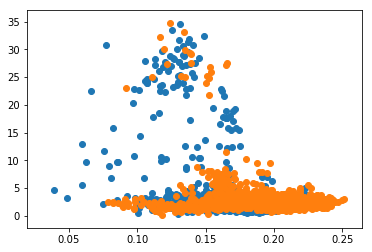

In [14]:
plt.scatter(males['meanfreq'], males['skew'])
plt.scatter(females['meanfreq'], females['skew'])

In [32]:
model = DummyClassifier()


f1 = cross_val_score(model,data[['meanfreq','sd','kurt','sfm','mode']], data['label'], cv = 10,
                scoring = "f1").mean()


f1

0.5026101190214689

In [29]:
model = LogisticRegression()


f1 = cross_val_score(model,data[['meanfreq','sd','kurt','sfm','mode']], data['label'], cv = 10,
                scoring = "f1").mean()


f1

0.59870538897260883

In [67]:
model = XGBClassifier(max_depth = 6, learning_rate = 0.1, n_estimators = 500)


f1 = cross_val_score(model,data[['meanfreq','sd','kurt','sfm','mode']], data['label'], cv = 10,
                scoring = "f1").mean()


f1

0.89234935884213851

In [ ]:
f1_scores = []
for i in range(3,15):
    model = XGBClassifier(max_depth = i)
    f1_scores.append(cross_val_score(model,data[['meanfreq','sd','kurt','sfm','mode']], data['label'], cv = 10,
                scoring = "f1").mean())

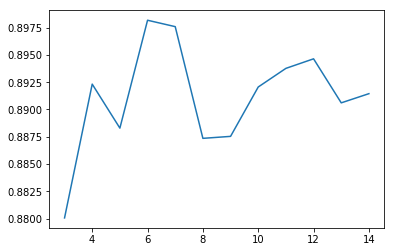

In [51]:
plt.plot(range(3,15), f1_scores)


In [63]:
f1_scores = []
for i in range(50,1000,50):
    model = XGBClassifier(max_depth = 6, n_estimators = i)
    f1_scores.append(cross_val_score(model,data[['meanfreq','sd','kurt','sfm','mode']], data['label'], cv = 5,
                scoring = "f1").mean())

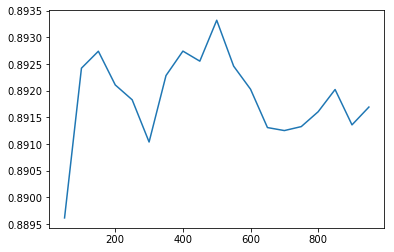

In [64]:
plt.plot(range(50,1000,50), f1_scores)